<a href="https://colab.research.google.com/github/Mk-luna/Data/blob/main/Analitycare5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalacion de las Dependencias

In [1]:
#!pip install keras-ocr
!pip install pytesseract
!pip install opencv-python
!apt-get install tesseract-ocr
#!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 k

In [2]:
#import nltk
import cv2
import pytesseract
#import keras_ocr
from google.colab import drive
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Cargar la imagen desde Google Drive
image_path = '/content/Imagen/img_004.jpeg'
image = cv2.imread(image_path)

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar OCR a la imagen
text = pytesseract.image_to_string(gray_image)

# Separar el texto en palabras o frases completas
words = text.split()

# Crear un DataFrame con las palabras o frases completas
df = pd.DataFrame({'Palabras': words})

# Guardar el DataFrame en un archivo CSV
csv_path = 'ruta_del_archivo.csv'
df.to_csv(csv_path, index=False)



Mounted at /content/drive


In [3]:
import pandas as pd

# Cargar el archivo CSV
csv_path = '/content/ruta_del_archivo.csv'
df = pd.read_csv(csv_path)

# Filtrar las palabras
palabras_filtradas = df[df['Palabras'].isin(['ERITROCITOS', 'HEMOGLOBINA', 'HEMATOCRITO',
'V.G.M','V.GM.','GLUCOSA','LEUCOCITOS', 'LINFOCITOS'])]

# Crear un arreglo para almacenar las posiciones **
posiciones_arreglo = []

# Iterar sobre las palabras filtradas
for index, row in palabras_filtradas.iterrows():
    palabra = row['Palabras']
    indice_palabra = df[df['Palabras'] == palabra].index[0]  # Obtener el índice de la palabra
    posiciones_siguientes = df.loc[indice_palabra:indice_palabra+1, 'Palabras'].values.tolist()  # Obtener el resulatdo de la palabra 
    posiciones_arreglo.extend(posiciones_siguientes)  # **Agregar las posiciones al arreglo
    print(f"Palabra: {palabra}, Siguientes posiciones: {posiciones_siguientes}")
    print(posiciones_arreglo)


Palabra: ERITROCITOS, Siguientes posiciones: ['ERITROCITOS', '4.84']
['ERITROCITOS', '4.84']
Palabra: HEMOGLOBINA, Siguientes posiciones: ['HEMOGLOBINA', '12.9']
['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9']
Palabra: HEMATOCRITO, Siguientes posiciones: ['HEMATOCRITO', '42.9']
['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9']
Palabra: V.GM., Siguientes posiciones: ['V.GM.', '88.8']
['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8']
Palabra: LEUCOCITOS, Siguientes posiciones: ['LEUCOCITOS', '4,000']
['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8', 'LEUCOCITOS', '4,000']
Palabra: LINFOCITOS, Siguientes posiciones: ['LINFOCITOS', '20-40']
['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8', 'LEUCOCITOS', '4,000', 'LINFOCITOS', '20-40']


Grafico de la primera variable a comparar

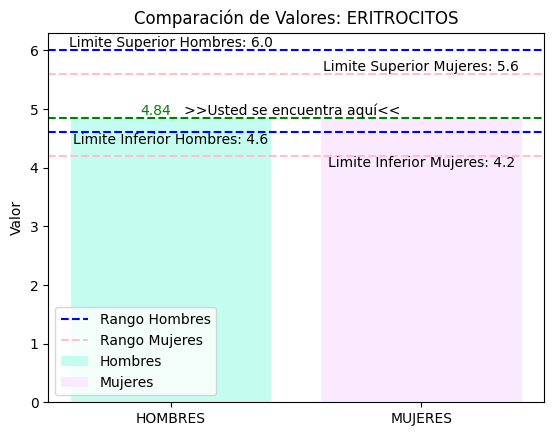

In [4]:
import matplotlib.pyplot as plt

# Arreglo generado
#posiciones_arreglo = ['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8', 'LEUCOCITOS', '4,000', 'LINFOCITOS', '20-40']

# Obtener el valor a comparar
valor = float(posiciones_arreglo[1])

# Rangos
rangosH = ['HOMBRES', 4.6, 6.0]
rangosM = ['MUJERES', 4.2, 5.6]

# Crear gráfico de barras
plt.bar(rangosH[0], valor, color='#c4fcef', label='Hombres')
plt.bar(rangosM[0], valor, color='#fbeaff', label='Mujeres')

# Agregar líneas para representar los rangos
plt.axhline(y=rangosH[1], color='blue', linestyle='--', label='Rango Hombres')
plt.axhline(y=rangosH[2], color='blue', linestyle='--')
plt.axhline(y=rangosM[1], color='pink', linestyle='--', label='Rango Mujeres')
plt.axhline(y=rangosM[2], color='pink', linestyle='--')

# Agregar etiquetas de valor
plt.text(0, valor, str(valor), ha='right', va='bottom', color='green')

# Agregar límites inferiores y superiores con etiquetas
plt.text(0, rangosH[1], "Limite Inferior Hombres: " + str(rangosH[1]), ha='center', va='top', color='black')
plt.text(0, rangosH[2], "Limite Superior Hombres: " + str(rangosH[2]), ha='center', va='bottom', color='black')
plt.text(1, rangosM[1], "Limite Inferior Mujeres: " + str(rangosM[1]), ha='center', va='top', color='black')
plt.text(1, rangosM[2], "Limite Superior Mujeres: " + str(rangosM[2]), ha='center', va='bottom', color='black')

# Agregar etiqueta "Usted se encuentra aquí"
plt.text(0,valor, "   >>Usted se encuentra aquí<<", ha='left', va='bottom', color='black')
plt.axhline(y=valor, color='green', linestyle='--')

# Personalizar el gráfico
plt.title("Comparación de Valores: "+posiciones_arreglo[0])
plt.ylabel("Valor")
plt.legend()

# Mostrar el gráfico
plt.show()


Grafico Generado para el siguiente valor a comparar Hemoglobina

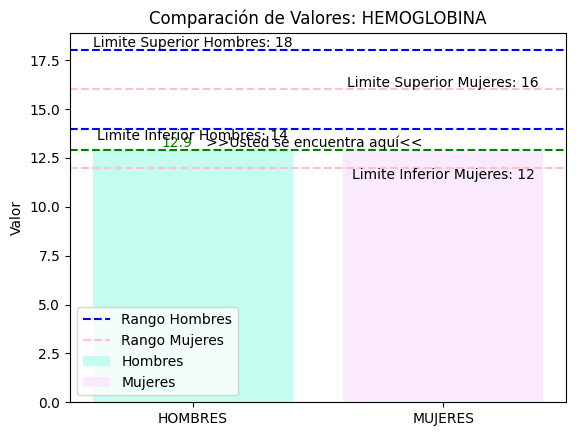

In [8]:
import matplotlib.pyplot as plt

# Arreglo generado
#posiciones_arreglo = ['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8', 'LEUCOCITOS', '4,000', 'LINFOCITOS', '20-40']

# Obtener el valor a comparar
valor = float(posiciones_arreglo[3])

# Rangos
rangosH = ['HOMBRES', 14,18]
rangosM = ['MUJERES', 12,16]

# Crear gráfico de barras
plt.bar(rangosH[0], valor, color='#c4fcef', label='Hombres')
plt.bar(rangosM[0], valor, color='#fbeaff', label='Mujeres')

# Agregar líneas para representar los rangos
plt.axhline(y=rangosH[1], color='blue', linestyle='--', label='Rango Hombres')
plt.axhline(y=rangosH[2], color='blue', linestyle='--')
plt.axhline(y=rangosM[1], color='pink', linestyle='--', label='Rango Mujeres')
plt.axhline(y=rangosM[2], color='pink', linestyle='--')

# Agregar etiquetas de valor
plt.text(0, valor, str(valor), ha='right', va='bottom', color='green')

# Agregar límites inferiores y superiores con etiquetas
plt.text(0, rangosH[1], "Limite Inferior Hombres: " + str(rangosH[1]), ha='center', va='top', color='black')
plt.text(0, rangosH[2], "Limite Superior Hombres: " + str(rangosH[2]), ha='center', va='bottom', color='black')
plt.text(1, rangosM[1], "Limite Inferior Mujeres: " + str(rangosM[1]), ha='center', va='top', color='black')
plt.text(1, rangosM[2], "Limite Superior Mujeres: " + str(rangosM[2]), ha='center', va='bottom', color='black')

# Agregar etiqueta "Usted se encuentra aquí"
plt.text(0,valor, "   >>Usted se encuentra aquí<<", ha='left', va='bottom', color='black')
plt.axhline(y=valor, color='green', linestyle='--')

# Personalizar el gráfico
plt.title("Comparación de Valores: "+posiciones_arreglo[2])
plt.ylabel("Valor")
plt.legend()

# Mostrar el gráfico
plt.show()


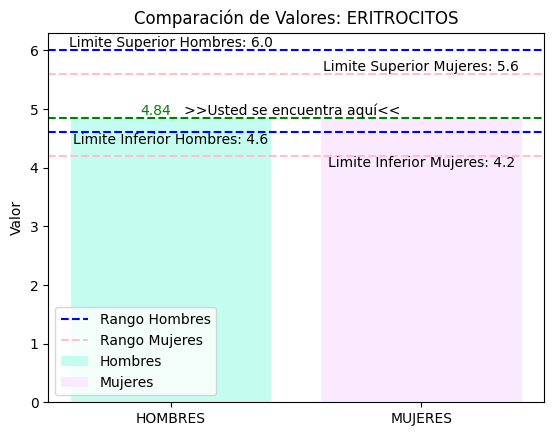

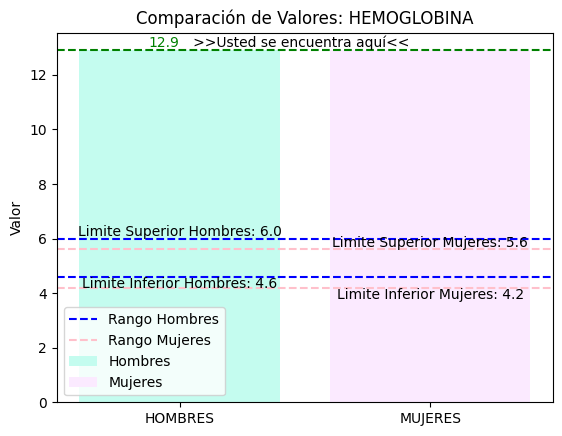

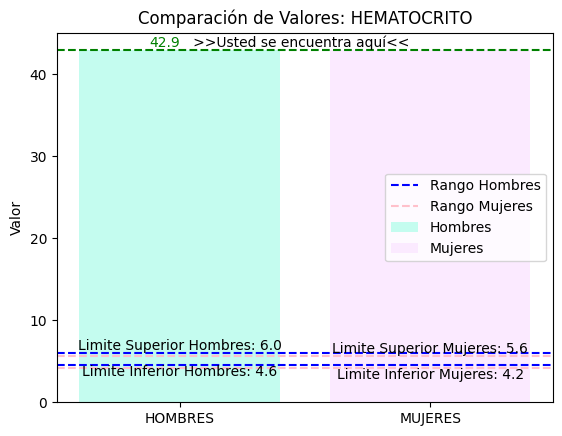

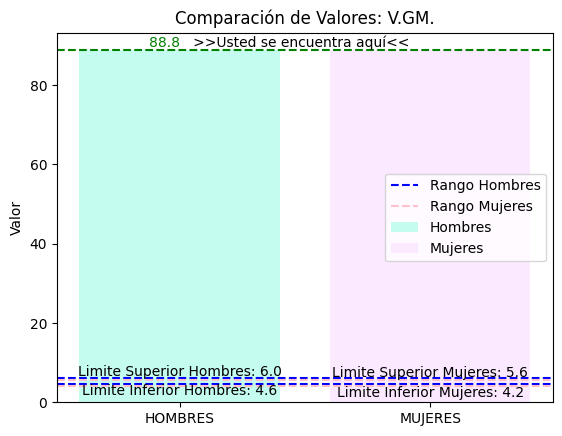

El valor 4,000 no es un número válido.
El valor 20-40 no es un número válido.


In [29]:
import matplotlib.pyplot as plt

def generar_grafico(rangosH, rangosM, valor, titulo):
    # Crear gráfico de barras
    plt.bar(rangosH[0], valor, color='#c4fcef', label='Hombres')
    plt.bar(rangosM[0], valor, color='#fbeaff', label='Mujeres')

    # Agregar líneas para representar los rangos
    plt.axhline(y=rangosH[1], color='blue', linestyle='--', label='Rango Hombres')
    plt.axhline(y=rangosH[2], color='blue', linestyle='--')
    plt.axhline(y=rangosM[1], color='pink', linestyle='--', label='Rango Mujeres')
    plt.axhline(y=rangosM[2], color='pink', linestyle='--')

    # Agregar etiquetas de valor
    plt.text(0, valor, str(valor), ha='right', va='bottom', color='green')

    # Agregar límites inferiores y superiores con etiquetas
    plt.text(0, rangosH[1], "Limite Inferior Hombres: " + str(rangosH[1]), ha='center', va='top', color='black')
    plt.text(0, rangosH[2], "Limite Superior Hombres: " + str(rangosH[2]), ha='center', va='bottom', color='black')
    plt.text(1, rangosM[1], "Limite Inferior Mujeres: " + str(rangosM[1]), ha='center', va='top', color='black')
    plt.text(1, rangosM[2], "Limite Superior Mujeres: " + str(rangosM[2]), ha='center', va='bottom', color='black')

    # Agregar etiqueta "Usted se encuentra aquí"
    plt.text(0, valor, "   >>Usted se encuentra aquí<<", ha='left', va='bottom', color='black')
    plt.axhline(y=valor, color='green', linestyle='--')

    # Personalizar el gráfico
    plt.title("Comparación de Valores: " + titulo)
    plt.ylabel("Valor")
    plt.legend()

    # Mostrar el gráfico
    plt.show()

# Arreglo generado
posiciones_arreglo = ['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8', 'LEUCOCITOS', '4,000', 'LINFOCITOS', '20-40']

# Separar arreglo en títulos y resultados
Titulo = posiciones_arreglo[::2]  # Valores pares del índice
Resultados = posiciones_arreglo[1::2]  # Valores impares del índice

# Rangos
rangosH = ['HOMBRES', 4.6, 6.0, 14, 18, 43, 55, 84, 103]
rangosM = ['MUJERES', 4.2, 5.6, 12, 16, 40, 47, 84, 103]

# Generar gráfico para cada valor
for i in range(len(Titulo)):
    valor = Resultados[i]
    if valor.replace('.', '', 1).isdigit():
        valor = float(valor)
        generar_grafico(rangosH, rangosM, valor, Titulo[i])
        
    else:
        print("El valor", valor, "no es un número válido.")


In [30]:
import matplotlib.pyplot as plt

def generar_grafico(rangosH, rangosM, valor, titulo, filename):
    # Crear gráfico de barras
    plt.bar(rangosH[0], valor, color='#c4fcef', label='Hombres')
    plt.bar(rangosM[0], valor, color='#fbeaff', label='Mujeres')

    # Agregar líneas para representar los rangos
    plt.axhline(y=rangosH[1], color='blue', linestyle='--', label='Rango Hombres')
    plt.axhline(y=rangosH[2], color='blue', linestyle='--')
    plt.axhline(y=rangosM[1], color='pink', linestyle='--', label='Rango Mujeres')
    plt.axhline(y=rangosM[2], color='pink', linestyle='--')

    # Agregar etiquetas de valor
    plt.text(0, valor, str(valor), ha='right', va='bottom', color='green')

    # Agregar límites inferiores y superiores con etiquetas
    plt.text(0, rangosH[1], "Limite Inferior Hombres: " + str(rangosH[1]), ha='center', va='top', color='black')
    plt.text(0, rangosH[2], "Limite Superior Hombres: " + str(rangosH[2]), ha='center', va='bottom', color='black')
    plt.text(1, rangosM[1], "Limite Inferior Mujeres: " + str(rangosM[1]), ha='center', va='top', color='black')
    plt.text(1, rangosM[2], "Limite Superior Mujeres: " + str(rangosM[2]), ha='center', va='bottom', color='black')

    # Agregar etiqueta "Usted se encuentra aquí"
    plt.text(0, valor, "   >>Usted se encuentra aquí<<", ha='left', va='bottom', color='black')
    plt.axhline(y=valor, color='green', linestyle='--')

    # Personalizar el gráfico
    plt.title("Comparación de Valores: " + titulo)
    plt.ylabel("Valor")
    plt.legend()

    # Guardar el gráfico en un archivo en formato PNG
    plt.savefig(filename, format='png')

    # Cerrar el gráfico para liberar memoria
    plt.close()

# Arreglo generado
posiciones_arreglo = ['ERITROCITOS', '4.84', 'HEMOGLOBINA', '12.9', 'HEMATOCRITO', '42.9', 'V.GM.', '88.8', 'LEUCOCITOS', '4,000', 'LINFOCITOS', '20-40']

# Separar arreglo en títulos y resultados
Titulo = posiciones_arreglo[::2]  # Valores pares del índice
Resultados = posiciones_arreglo[1::2]  # Valores impares del índice

# Rangos
rangosH = ['HOMBRES', 4.6, 6.0, 14, 18, 43, 55, 84, 103]
rangosM = ['MUJERES', 4.2, 5.6, 12, 16, 40, 47, 84, 103]

# Generar gráfico para cada valor
for i in range(len(Titulo)):
    valor = Resultados[i]
    if valor.replace('.', '', 1).isdigit():
        valor = float(valor)
        filename = Titulo[i].replace(' ', '_') + '.png'  # Nombre de archivo único
        generar_grafico(rangosH, rangosM, valor, Titulo[i], filename)
    else:
        print("El valor", valor, "no es un número válido.")


El valor 4,000 no es un número válido.
El valor 20-40 no es un número válido.
